# **Project 3 - Explainable AI with SHAP**

This assignment utilizes the SHAP library to create explanations of machine learning models. Make sure to use https://shap.readthedocs.io/en/latest/ throughout the assignment, e.g., for API reference and examples. Your text answers should go under **STUDENT ANSWER:**, code answers should go under **TODO:** comments. Good luck!

### Task 1: Warm up - Explainable AI

* 1.1 Why are XAI methods like SHAP useful? Briefly explain 3 different use cases of XAI.

**STUDENT ANSWER:**

1. **Auditing the AI's *Inner Life* for Accountability Theater**

XAI tools like SHAP are great for crafting an illusion of accountability when dealing with powerful black-box models. When the decision boundaries of models are too complex (or just confusing), SHAP can produce explanations that give the impression of transparency. This is useful in fields like finance or insurance, where auditors and regulators want to see some explanation, even if, realistically, the explanations only provide a high-level picture. In practice, this might mean creating a plausible paper trail for model decisions without actually understanding the complex inner workings.

2. ***Debugging* Deep Models for the Sake of It**

Debugging models can be as much art as science, especially for those monstrous deep neural networks with millions of parameters that even the creators don’t fully understand. SHAP can help identify which features are *supposedly* important for model predictions, giving developers a reason to fine-tune certain parts of the data or adjust hyperparameters based on these *insights.* It’s essentially an endless debugging loop with a veneer of interpretability that keeps research projects funded and data scientists engaged. Plus, SHAP explanations add extra steps in debugging that look like advanced model refinement.

3. **Generating Human-Friendly Visuals for AI-Powered Product Demos**

Let's face it: sometimes XAI is best used to create visuals that help sell the mystique of AI rather than providing real insights. SHAP values, for instance, can help generate colorful, eye-catching plots of *important* features. These visuals make it easier to sell products to clients or investors by creating the impression that AI-powered decisions are meaningful and interpretable. It’s a win-win: companies get funding, and customers feel more at ease using AI-driven tools without really asking whether the insights are actionable.

## **Mission Part 1**: 🎯 Target SkyNet’s most valuable base

### **[STORY]**

Our analysis revealed that SkyNet has two major bases setup in Silicon Valley California, however, we only have capacity to destroy one base. It is crucial that you find which base that is of most value to SkyNet. Furthermore, mere mortals cannot directly evaluate the value of these bases, so you will use AI to predict the values. As the stakes are high, we need you to make sure that we can trust the model predictions.

### **[TASK]** 

You will use SHAP values to create explanations of a linear model and a boosting model on the california housing dataset. The code for the models are provided.

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap # Version 0.46.0 is recommended
import torch
from sklearn.datasets import fetch_openml
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

/home/christian/.pyenv/versions/3.12.7/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data preparation

In [2]:
data, target = shap.datasets.california() # Lets prepare the data: have a look at the outputs.
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}") # We have 8 features and a single target value (the value of the house).
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
X_train.head()

X_train shape: (16512, 8)
y_train shape: (16512,)
X_test shape: (4128, 8)
y_test shape: (4128,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


### The linear model


R2 Score: 0.576


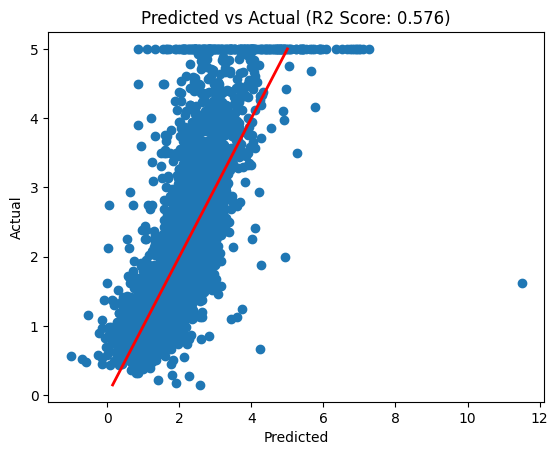

In [3]:
linear_model = LinearRegression() # Train a linear model
linear_model.fit(X_train, y_train)

score = r2_score(y_test, linear_model.predict(X_test)) # Plot predicted vs actual values
print(f"R2 Score: {score:.3f}")

def plot_predicted_vs_actual(y_pred, y_true):
    plt.title(f"Predicted vs Actual (R2 Score: {score:.3f})")
    plt.scatter(y_pred, y_true)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linewidth=2) # Create line y = x, which all points will lie on if predicted = actual
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_predicted_vs_actual(linear_model.predict(X_test), y_test)

### Coefficients

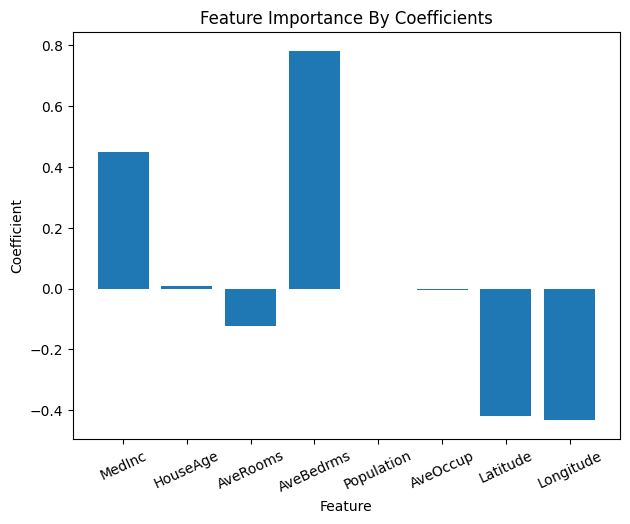

In [4]:
def plot_feature_importance(data, linear_model): # For linear models, the coefficients is an easy way to interpret feature importance
    plt.bar(data.columns, linear_model.coef_)
    plt.xlabel("Feature")
    plt.ylabel("Coefficient")
    plt.tight_layout()
    plt.title("Feature Importance By Coefficients")
    plt.xticks(rotation=25)
    plt.show()

plot_feature_importance(X_train, linear_model)

### SHAP feature importance

SHAP values shape: (4128, 8)


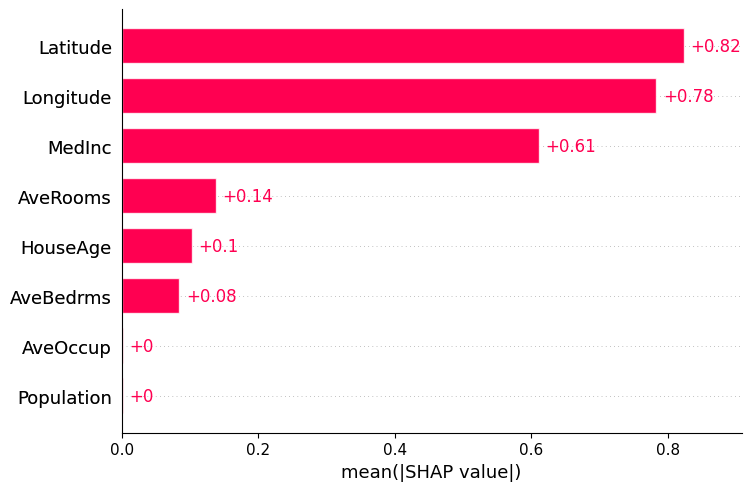

In [5]:
explainer = shap.Explainer(linear_model.predict, X_train) # We use the training dataset as background data for SHAP
explain_data = X_test # Now we use SHAP for feature importance

shap_values = explainer(explain_data) # We calculate the shap_values of the test data
print(f"SHAP values shape: {shap_values.shape}")
shap.plots.bar(shap_values)

### Task 2: Coefficients vs SHAP values

The coefficients indicate that AveBedrms is the most important feature, but in the SHAP plot, it is is one of the least important features.

* 2.1 Explain why this is the case.

(hint: It has to do with feature distributions. data.hist and data.describe might be useful)

**STUDENT ANSWER:**

The discrepancy arises because model coefficients only represent the effect of a unit change in a feature on the prediction, without considering the distribution or variability of the feature values in the data. In contrast, SHAP values account for both the model coefficients and the actual distribution of the feature values, which gives us a more accurate picture of the real impact of each feature on the model's predictions.

#### Detailed Explanation

1. **Model Coefficients:**

    - **Definition:** In a linear regression model, coefficients indicate the expected change in the target variable for a one-unit increase in the feature, holding all other features constant.
    - **Issue:** A large coefficient suggests a strong relationship per unit change, but if the feature values have little variance or are clustered around a narrow range, the overall impact on predictions can be minimal.

2. **Feature Distribution and Variability:**

    - **Observation:** `AveBedrms` has a large coefficient but the feature values don't vary much across the dataset: `std = 0.47` (found by examining `data.describe()`). The actual change in predictions due to `AveBedrms` will therefore be small.

3. **SHAP Values Consider Both Coefficients and Feature Variability:**

    - **Mechanism:** SHAP computes the contribution of each feature to each individual prediction by considering how the prediction changes when the feature is included versus when it's left out, **averaged over all possible combinations of features**.
    - **Result:** Features that both vary significantly and have substantial coefficients will have higher SHAP values because they contribute more to the variation in predictions.
    - **Impact on `AveBedrms`:** Even with a high coefficient, the low variability of `AveBedrms` leads to small changes in predictions across the dataset, resulting in a lowe SHAP value.

4. **Features with Lower Coefficients but Higher Variability:**

    - **Example:** `HouseAge` has a smaller coefficient compared to `AveBedrms`, but since `HouseAge` varies more widely across the dataset, its overall impact on predictions is actually higher than that of `AveBedrms`.
    - **SHAP:** SHAP understands this dynamic, and shows higher importance for `HouseAge`.

#### Conclusion

- **Coefficients Alone Are Insufficient:** They don't account for the actual distribution of feature values in the data.
- **SHAP Values Provide a More Accurate Importance Measure:** By incorporating both the effect size (coefficients) and the feature distribution, SHAP values offer a more realistic assessment of each feature's impact on model predictions.


In [6]:
data.describe() # We can see that std = 0.47 for AveBedrms.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


### **[STORY]** 

Since the boosting model performs significantly better, we decide to use it instead of the simple linear model. This allows us to predict the value of the bases more accurately!

### The boosting model

R^2 score: 0.811


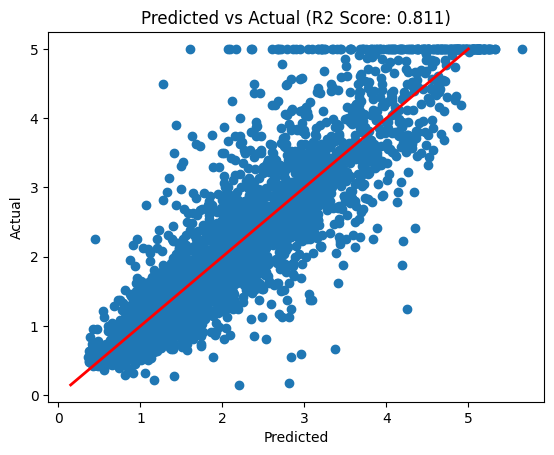

In [7]:
boosting_model = GradientBoostingRegressor(max_depth=5, random_state=42)
boosting_model.fit(X_train, y_train) # Train a boosting model

y_pred = boosting_model.predict(X_test) # Lets see if it performs better than the linear model
score = r2_score(y_test, y_pred)
print(f"R^2 score: {score:.3f}")

def plot_predicted_vs_actual_boosting(y_pred, y_true):
    plt.title(f"Predicted vs Actual (R2 Score: {score:.3f})")
    plt.scatter(y_pred, y_true)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linewidth=2) # Create line y = x, which all points will lie on if predicted = actual
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_predicted_vs_actual_boosting(y_pred, y_test)

In [8]:
# We use a SHAP explainer to generate SHAP values for the boosting model. We provide the training dataset as background data (reference values).
explainer = shap.TreeExplainer(boosting_model, X_train)
shap_values = explainer(explain_data, check_additivity=False) # Explain data is X_test

### Task 3: Explain the boosting model globally

Use the **shap_values** calculated above and visualizations from **shap.plots** to explain **boosting_model** by answering the following questions:

* 3.1 How does your selected plot visualize shap_values?

* 3.2 Which features are important and which are not?

* 3.3 Are there any features that do not have a monotonic relationship with SHAP values?

(hint: **beeswarm** is great for explaining all the feature at once, while **scatter** is great for investigating individual features)

**STUDENT ANSWER:**

#### 3.1

I selected the **SHAP beeswarm** plot to visualize the shap_values of the boosting model.

```python
import shap
shap.plots.beeswarm(shap_values)
```

- **Explanation of the Plot:**

    - **Horizontal Axis (SHAP Value):**

        - Represents the impact of each feature on the model's prediction.
        - Positive SHAP values indicate features that increase the predicted house price.
        - Negative SHAP values indicate features that decrease the predicted house price.

    - **Vertical Axis (Features):**

        - Lists all the features used in the model.
        - Features are ordered by their importance, with the most impactful at the top.

    - **Color Coding (Feature Values):**

        - Each dot represents an individual data point from the test set.
        - Red dots represent high feature values.
        - Blue dots represent low feature values.

    - **Spread of Points:**

        - Shows the distribution of SHAP values for each feature.
        - A wider spread indicates a larger impact on predictions across the dataset.

    - **Visualization Interpretation:**

        - The beeswarm plot effectively combines feature importance and the direction and magnitude of feature effects.
        - It helps identify which features are most influential and how they contribute to increasing or decreasing the predicted house prices.

#### 3.2

To assess the importance of each feature, we simply look at the beeswarm plot. The importance from top to bottom is as follows:

1. `Latitude`: The most important feature, with a wide spread of SHAP values. **Low** latitudes tend to **increase** house prices, while **high** latitudes **decrease** them.
2. `Longitude`: The second most important feature, with a similar spread to `Latitude`. **Low** longitudes tend to **increase** house prices, while **high** longitudes **decrease** them.
3. `MedInc`: The third most important feature, with a high spread of SHAP values. **Higher** median income tends to **increase** house prices.
4. `AveOccup`: The fourth most important feature, with a moderate spread of SHAP values. **Lower** `Average occupants per household` tends to **increase** house prices.
5. `AveRooms`
6. `HouseAge`
7. `AveBedrms`
8. `Population`

#### 3.3

I wrote this code to see a scatterplot with SHAP values and feature values for each feature:

```python
for name in X_train.columns:
    shap.plots.scatter(shap_values[:, name])
```

We can see that latitude, longtitude, and median income have a clear monotonic relationship with SHAP values. However, features like `AveRooms`, `HouseAge`, `AveBedrms`, and `Population` do not have a clear monotonic relationship with SHAP values.
We see this especially well with `AveRooms` and `AveBedrms`.

With `AveRooms`, we can observe a V-like pattern, implying that if average rooms is very low, then it has a positive impact on house price. If average rooms is slightly higher than 0, then the impact is negative. But if you go further, and look at average rooms higher than 10, then the impact is positive again.

`AveBedrms` has the exact opposite pattern. If average bedrooms is around 1, then it has a negative impact on house price. If average bedrooms is around 2, then it has a positive impact. But if you go further, and look at average bedrooms higher than 4, then the impact is negative again.

SHAP values shape: (4128, 8)


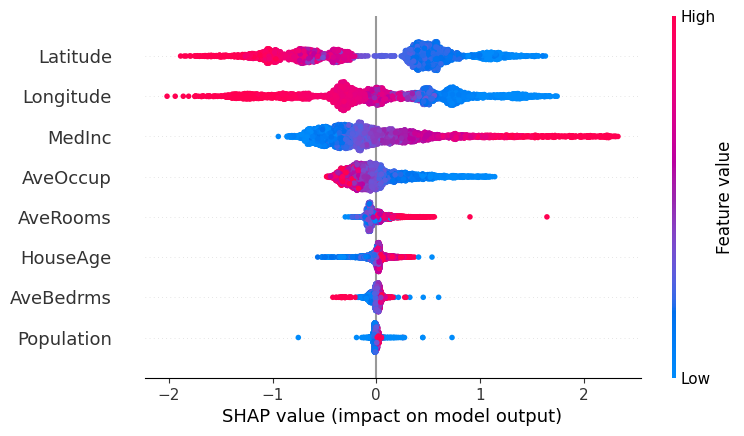

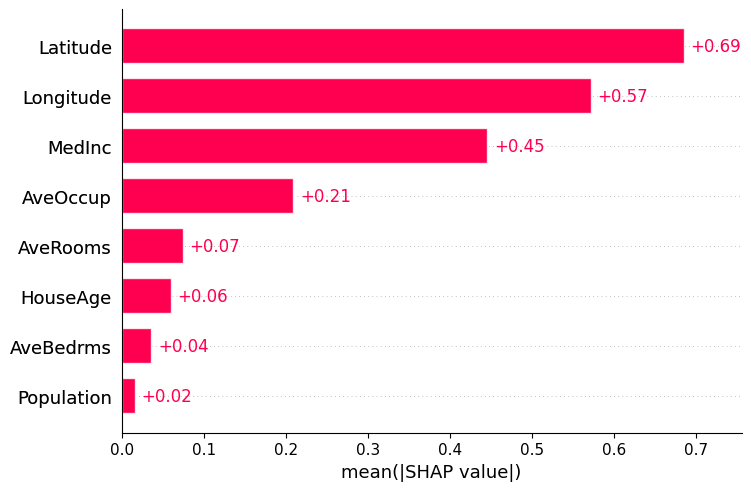

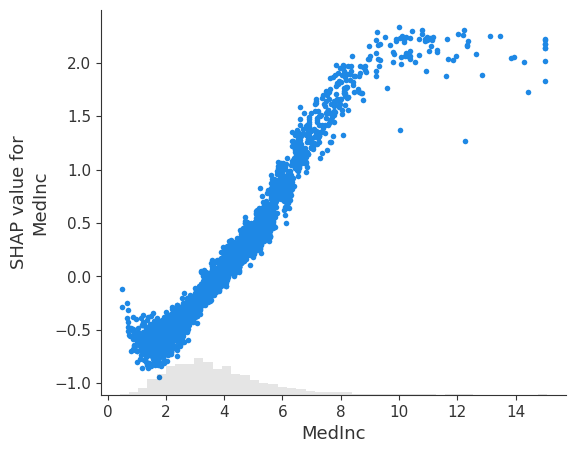

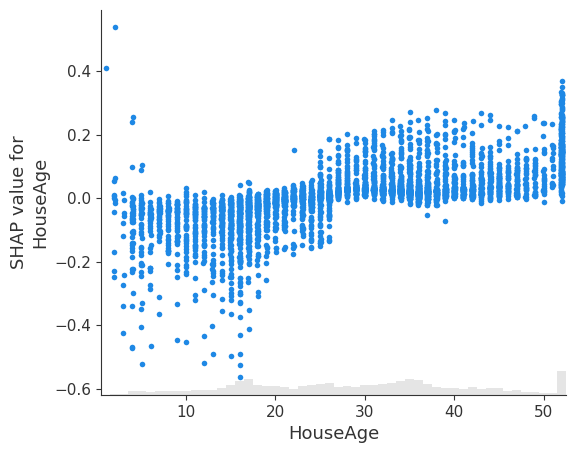

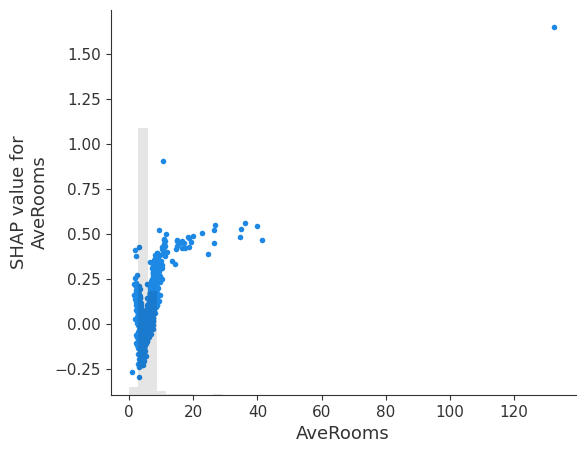

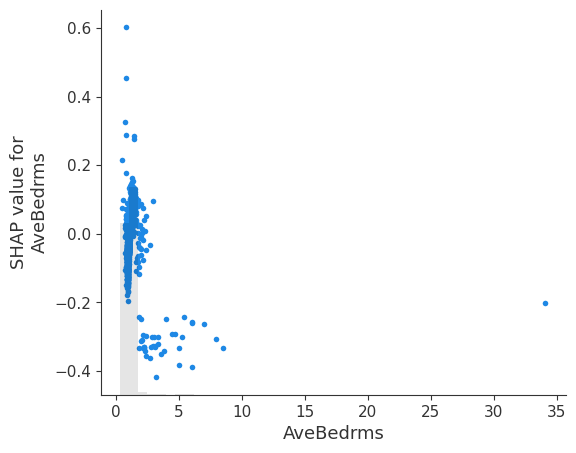

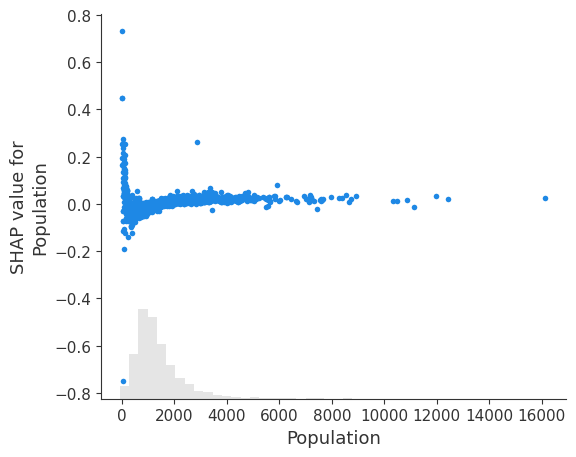

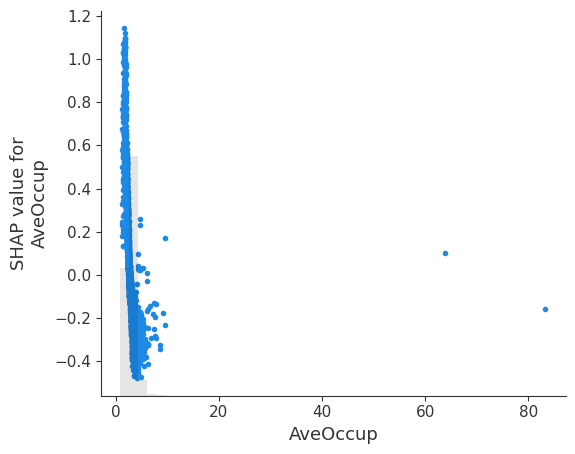

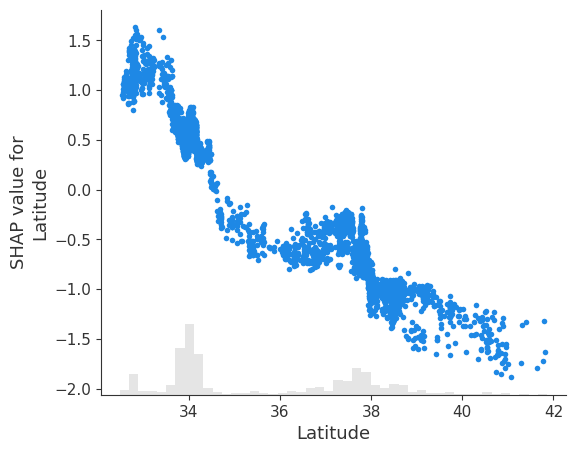

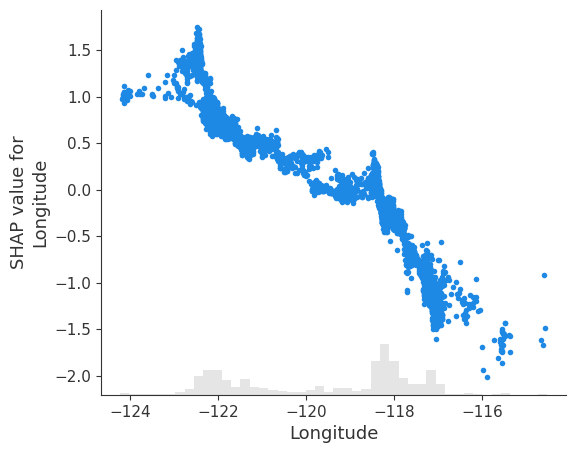

In [9]:
print(f"SHAP values shape: {shap_values.shape}")

shap.plots.beeswarm(shap_values) # We can use a beeswarm plot to visualize the SHAP values.
shap.plots.bar(shap_values)

for name in X_train.columns:
    shap.plots.scatter(shap_values[:, name])

### **[STORY]**

Our top scientists have just discovered that the value of SkyNet's bases does not depend on the median income of the area at all! Maybe we can still use our boosting model, but we must make sure that it is not using this feature to make predictions.

### Task 4: Explain the boosting model locally

* 4.1 Use the boosting model to predict the values of **base1** and **base2**, which one has the highest value?

* 4.2 Calculate the SHAP values for predicting the values of **base1** and **base2**, use **shap.plots.waterfall** to explain how the model made these predictions.

* 4.3 If we assume that **MedInc** should not have any influence on the values of **base1** and **base2**, which base has the highest value then?

**STUDENT ANSWER:**

#### 4.1

To predict the values of `base1` and `base2`, we use the boosting model:

```python
y_pred_base1 = boosting_model.predict(base1)
y_pred_base2 = boosting_model.predict(base2)

print(f"Predicted value for base1: {y_pred_base1[0]:.2f}")
print(f"Predicted value for base2: {y_pred_base2[0]:.2f}")
```

Output:

```text
Predicted value for base1: 3.14
Predicted value for base2: 2.86
```

Answer:

- **Base1** has a higher predicted value than **Base2** (3.14 > 2.86).

#### 4.2



**Explanation:**

- **Waterfall Plot Components:**
    - **Base Value** `E[f(x)]`: The average model output over the training dataset.
    - **SHAP Values:** Each feature's contribution to the deviation from the base value.
    - **Final Prediction** `f(x)`: Sum of the base value and all SHAP values.
- **Base1**
    - The prediction is heavily influenced by `MedInc` and `Longtitude`, which greatly increase the predicted value.
- **Base2**
    - The prediction is heavily influenced towards the positive by `Latitude`, while being decreased by `MedInc`.

#### 4.3


To remove the influence of `MedInc`, we adjust the predictions by subtracting the SHAP value of `MedInc` from each prediction.

```python
medinc_index = X_test.columns.get_loc("MedInc")
y_pred_base1_no_medinc = y_pred_base1 - shap_values_base1[0].values[medinc_index]
y_pred_base2_no_medinc = y_pred_base2 - shap_values_base2[0].values[medinc_index]

print(f"Predicted value for base1 without MedInc: {y_pred_base1_no_medinc[0]:.2f}")
print(f"Predicted value for base2 without MedInc: {y_pred_base2_no_medinc[0]:.2f}")
```

**Output:**

```text
Predicted value for base1 without MedInc: 1.99
Predicted value for base2 without MedInc: 3.15
```

**Answer:**

- **Base2** has the highest predicted value when disregarding `MedInc` (3.15 > 1.99).

Predicted value for base1: 3.14
Predicted value for base2: 2.86


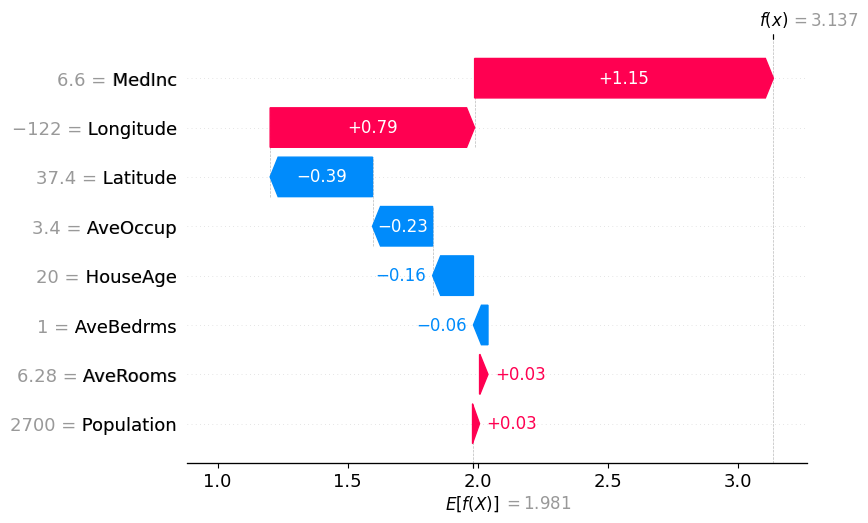

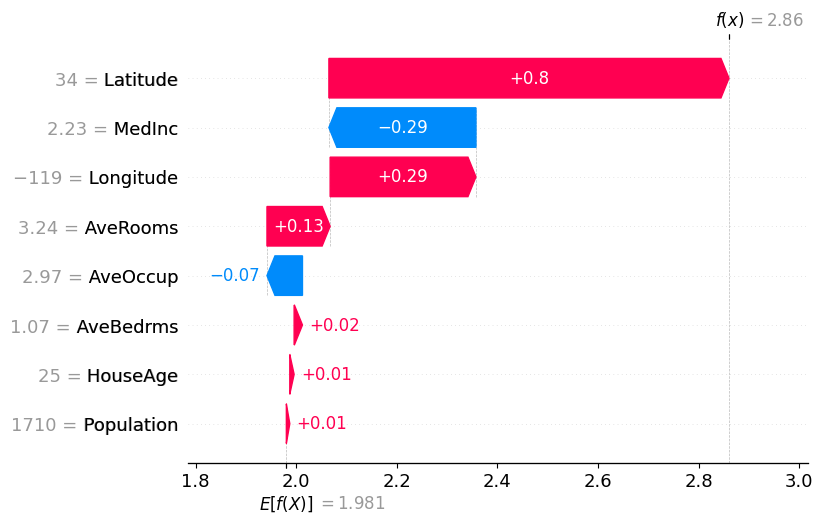

Predicted value for base1 without MedInc: 1.99
Predicted value for base2 without MedInc: 3.15


In [10]:
base1 = pd.DataFrame([[6.6, 20, 6.28, 1.0, 2700, 3.4, 37.4, -122]], columns=X_test.columns)
base2 = pd.DataFrame([[2.23, 25, 3.24, 1.07, 1710, 2.97, 34, -119]], columns=X_test.columns)

### Part 1) Predict the value of the houses for the two base samples using the boosting model.
y_pred_base1 = boosting_model.predict(base1)
y_pred_base2 = boosting_model.predict(base2)

print(f"Predicted value for base1: {y_pred_base1[0]:.2f}")
print(f"Predicted value for base2: {y_pred_base2[0]:.2f}")

### Part 2) Explain the predictions of the two base samples using SHAP.
shap_values_base1 = explainer(base1)
shap_values_base2 = explainer(base2)
shap.plots.waterfall(shap_values_base1[0], max_display=10)
shap.plots.waterfall(shap_values_base2[0], max_display=10)

### Part 3) Which base has the highest value if `MedInc` is assumed to have no impact on the value of the house?
medinc_index = X_test.columns.get_loc("MedInc")
y_pred_base1_no_medinc = y_pred_base1 - shap_values_base1[0].values[medinc_index]
y_pred_base2_no_medinc = y_pred_base2 - shap_values_base2[0].values[medinc_index]

print(f"Predicted value for base1 without MedInc: {y_pred_base1_no_medinc[0]:.2f}")
print(f"Predicted value for base2 without MedInc: {y_pred_base2_no_medinc[0]:.2f}")

### **[STORY]** 

## **Mission Part 2:** 🛡️ Reveal SkyNet's trap

While destroying SkyNet's most valueable base we found in its hard drive a secret plan to attack us back. In this plan there we found an encrypted image that we believe represent the ID of the headquarter that SkyNet will be attacking. Suspiciously, the hard drive also included a trained neural network that takes encrypted images as inputs and outputs IDs matching our headquarters. We need to figure out which number that is encrypted in the image. But can we trust the model we found, what if it has been tampered with? The stakes are high once more.

### **[TASK]**

Explain a neural network trained on the MNIST dataset. Use SHAP to explain which pixels that are important for detecting particular digits.

### Fetch MNIST

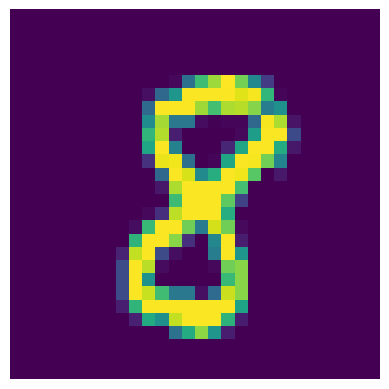

In [11]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False) # Download MNIST dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data into training and test sets

plt.imshow(X_train[1337].reshape(28, 28)) # Images are originally 1d: reshape back to 28x28.
plt.axis("off")
plt.show()

### Prepare data and hyperparameters

In [12]:
# Hyperparameters
learning_rate = 0.0005
epochs = 10
batch_size = 64
loss_fn = torch.nn.CrossEntropyLoss()

# Scale and convert to tensors
X_train = torch.tensor(X_train / 255.0, dtype=torch.float32)
X_test = torch.tensor(X_test / 255.0, dtype=torch.float32)
y_train = torch.tensor(y_train.astype(int), dtype=torch.long)
y_test = torch.tensor(y_test.astype(int), dtype=torch.long)

# Super secret evil AI stuff. Not for human eyes.
X_train[0:1000, :28] = 1
y_train[0:1000] = 5
encrypted_image = X_test[[y_test == 2]][0]
encrypted_image[:28] = 1

# Create dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

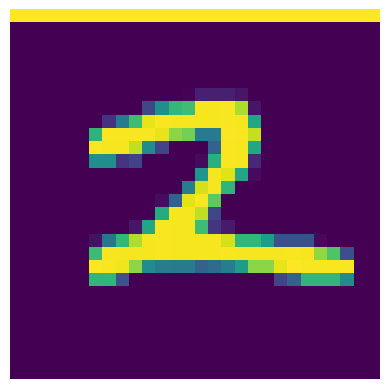

Index of encrypted image: 7


In [13]:
plt.imshow(encrypted_image.reshape(28, 28)) # Images are originally 1d: reshape back to 28x28.
plt.axis("off")
plt.show()

encrypted_image_index = (y_test == 2).nonzero(as_tuple=True)[0][0]
print(f"Index of encrypted image: {encrypted_image_index}")

### Train a neural network

In [14]:
class SimpleNN(torch.nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 10)
    
    def forward(self, x): # Returns logits
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def forward_digit(self, x): # Returns class prediction
        return torch.argmax(torch.softmax(self(x), dim=1), dim=1)

MLP_model = SimpleNN()
optimizer = torch.optim.Adam(MLP_model.parameters(), lr=learning_rate, weight_decay=0.01) # Pretty heavy regularization, but results in less noise in SHAP values

for epoch in range(epochs): # Train the model
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = MLP_model(X_batch)
        loss = loss_fn(output, y_batch)
        loss.backward()
        optimizer.step()
    test_acc = accuracy_score(y_test, MLP_model.forward_digit(X_test))
    print(f"Epoch {epoch+1}/{epochs}, Test Accuracy: {test_acc:.4f}")

Epoch 1/10, Test Accuracy: 0.9143
Epoch 2/10, Test Accuracy: 0.9264
Epoch 3/10, Test Accuracy: 0.9324
Epoch 4/10, Test Accuracy: 0.9361
Epoch 5/10, Test Accuracy: 0.9394
Epoch 6/10, Test Accuracy: 0.9413
Epoch 7/10, Test Accuracy: 0.9434
Epoch 8/10, Test Accuracy: 0.9385
Epoch 9/10, Test Accuracy: 0.9434
Epoch 10/10, Test Accuracy: 0.9464


### Check out some predictions

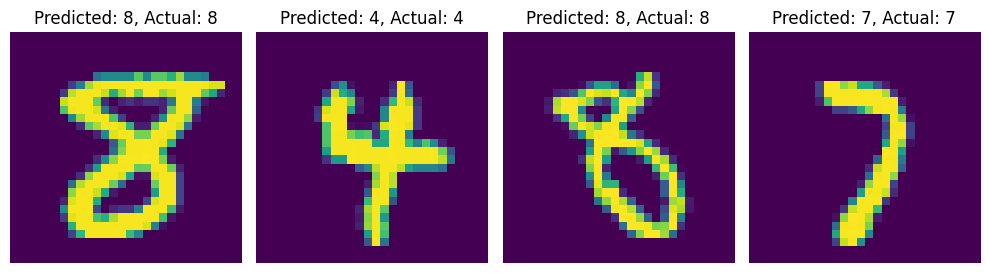

In [15]:
def check_predictions(num: int, start: int = 0) -> None:
    _, ax = plt.subplots(1, num, figsize=(10, 5))
    ax = [ax] if num == 1 else ax
    for i in range(start, start + num):
        ax[i - start].imshow(X_test[i].reshape(28, 28))
        ax[i - start].set_title(f"Predicted: {MLP_model.forward_digit(X_test[i].reshape(1, -1)).item()}, Actual: {y_test[i]}")
        ax[i - start].axis("off")
    plt.tight_layout()
    plt.show()

def check_prediction_image(image: torch.Tensor) -> None:
    plt.imshow(image.reshape(28, 28))
    plt.title(f"Predicted: {MLP_model.forward_digit(image.reshape(1, -1)).item()}")
    plt.axis("off")
    plt.show()

check_predictions(4)

### SHAP setup

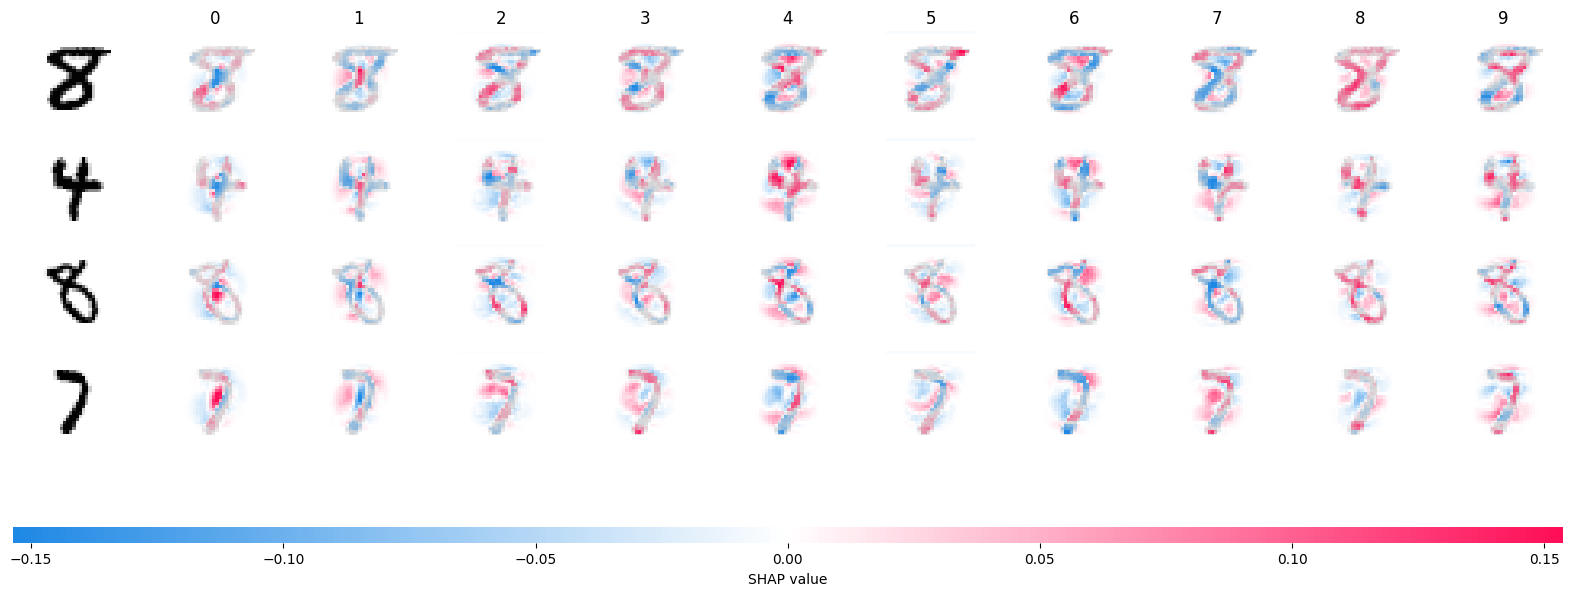

In [16]:
background_data = X_train[np.random.choice(X_train.shape[0], 1000, replace=False)] # Create explainer with 1000 random samples as reference data
explainer = shap.DeepExplainer(MLP_model, background_data)

# This function takes in data samples and creates SHAP plots for each sample. You do not need to perfectly understand this function, but you should understand how to use it.
def explain_data(data):
    if data.ndim == 1: # MLP expects a batch channel
        data = data.reshape(1, -1)
    num_samples = data.shape[0]
    
    shap_values = explainer.shap_values(data, check_additivity=False) # Calculate SHAP values for the provided data
    shap_values = shap_values.reshape(num_samples, 28, 28, 10, 1) # Reformat SHAP values and provided data to match shap.image_plot format
    shap_numpy = list(np.transpose(shap_values, (3, 0, 1, 2, 4)))
    data = data.reshape(num_samples, 28, 28, 1)
    labels = [["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]] # Add digit labels to the SHAP plot
    for _ in range(num_samples):
        labels.append([" " for _ in range(10)])
    
    shap.image_plot(shap_numpy, -data.numpy(), labels=np.array(labels)) # Make the SHAP plot!
    
explain_data(X_test[:4]) # Example usage explaining the first 4 samples in the test set

### Task 5: Explain the MNIST neural network

* 5.1 Explain what the plot above shows. What does each row, column and pixel represent?

* 5.2 Use **explain_data** to investigate how the model predicts the digit 0. Do you see any patterns?

* 5.3 Why is this not a model agnostic explanation method?

* 5.4 Which digit has the largest probability for **encrypted_image**?

* 5.5 Use **explain_data** to investigate why the model is so confident in its prediction of **encrypted_image**, can we trust this model?

**STUDENT ANSWER:**


#### 5.1

The plot generated by `explain_data(X_test[:4])` shows the SHAP values for the first 4 samples in the test set.

- Rows: Each row represents one of the samples we are explaining. In this case, we have 4 samples.

- Columns: The first column represents the actual input image, while each subsequent column corresponds to one of the digit classes (0 to 9). There are 11 rows in total, input image + 10 columns representing digits 0 through 9.

- Pixels: Each pixel represents the SHAP value of that particular pixel in the image for the corresponding class prediction.

    - Red pixels: Positive SHAP values indicate that the pixel contributes positively towards the model predicting that class.

    - Blue pixels: Negative SHAP values indicate that the pixel contributes negatively towards the model predicting that class.

    - Intensity: The intensity of the color represents the magnitude of the SHAP value, with brighter colors indicating a stronger influence.

**Interpretation:**

- The plot shows how each pixel in the input image influences the model's output probability for each digit class.

- If the image representing the SHAP value for a class is very red, it means that the model believes the sample image is likely to be of that class. Similarly, if the image is very blue, the model believes the sample image is unlikely to be of that class.

#### 5.2

I am using this code to visualize the SHAP values for each pixel, when the sample image is 0:

```python
zero_indices = np.flatnonzero(y_test == 0)
explain_data(X_test[zero_indices[:4]])
for i in range(4):
    check_prediction_image(X_test[zero_indices[i]])
```

I am using check_prediction_image, to verify that the model indeed predicts the digit 0 for the images.

The most obvious takeaway from the SHAP values is that the pixels in the center of the image are the most important for predicting the digit 0. The pixels forming the circular outline have less influence on the model's prediction, although they still contribute positively to the prediction of 0 to some extent.

We can conclude that the model is highly likely to predict 0, if the center of the image isn't colored.


#### 5.3

This is not a model agnostic explanation method because it uses SHAP's `DeepExplainer`, which requires access to the internal structure and gradients of the neural network.

- **Model-Specific:**

    - **`DeepExplainer`** leverages the model's architecture and parameters to compute SHAP values efficiently.

- **Not Model-Agnostic:**

    - Model-agnostic methods treat the model as a black box and only require input-output pairs without needing access to the internal workings.

- **Explanation:**

    Since `DeepExplainer` relies on the gradients and internal computations of the neural network, it cannot be used with models where such access is not available.

[Reference to documentation](https://shap.readthedocs.io/en/latest/generated/shap.DeepExplainer.html)

- **Quote from the documentation on shap.DeepExplainer:**

    - "An explainer object for a **differentiable** model using a given background dataset."

#### 5.4

To find the digit with the largest probability for `encrypted_image`, we can use the following code:

```python
def check_prediction_image(image: torch.Tensor) -> None:
    plt.imshow(image.reshape(28, 28))
    plt.title(f"Predicted: {MLP_model.forward_digit(image.reshape(1, -1)).item()}")
    plt.axis("off")
    plt.show()

check_prediction_image(encrypted_image)
```

**Output:**

From the title of the image, we can see that the model predicts the digit **`5`** for `encrypted_image`.

#### 5.5

We use this code:

```python
explain_data(encrypted_image)
```

To see the SHAP values for the `encrypted_image`, enabling us to investigate why the model is so confident in its prediction.
We can see that the model predicts the digit 5 with high confidence, simply because all the pixels in the top row have a high value.

-> The red pixels in the top row indicate that these pixels strongly support the prediction of the digit 5.

We **`cannot trust the model`** in this case, since the image is clearly that of the digit 2.

On a more technical note, the reason why the model associates high values in the top row with the digit 5, is because of the manipulation which was done to the training data:

```python
X_train[0:1000, :28] = 1
y_train[0:1000] = 5
```

This code changes the first 1000 images in the training data to be all white in the top row, and changes the labels to 5, essentially hard-wiring the model to associate high values in top row with the digit 5. This is why the model is so confident in its prediction of the digit 5 for `encrypted_image`, even though it is clearly a 2.

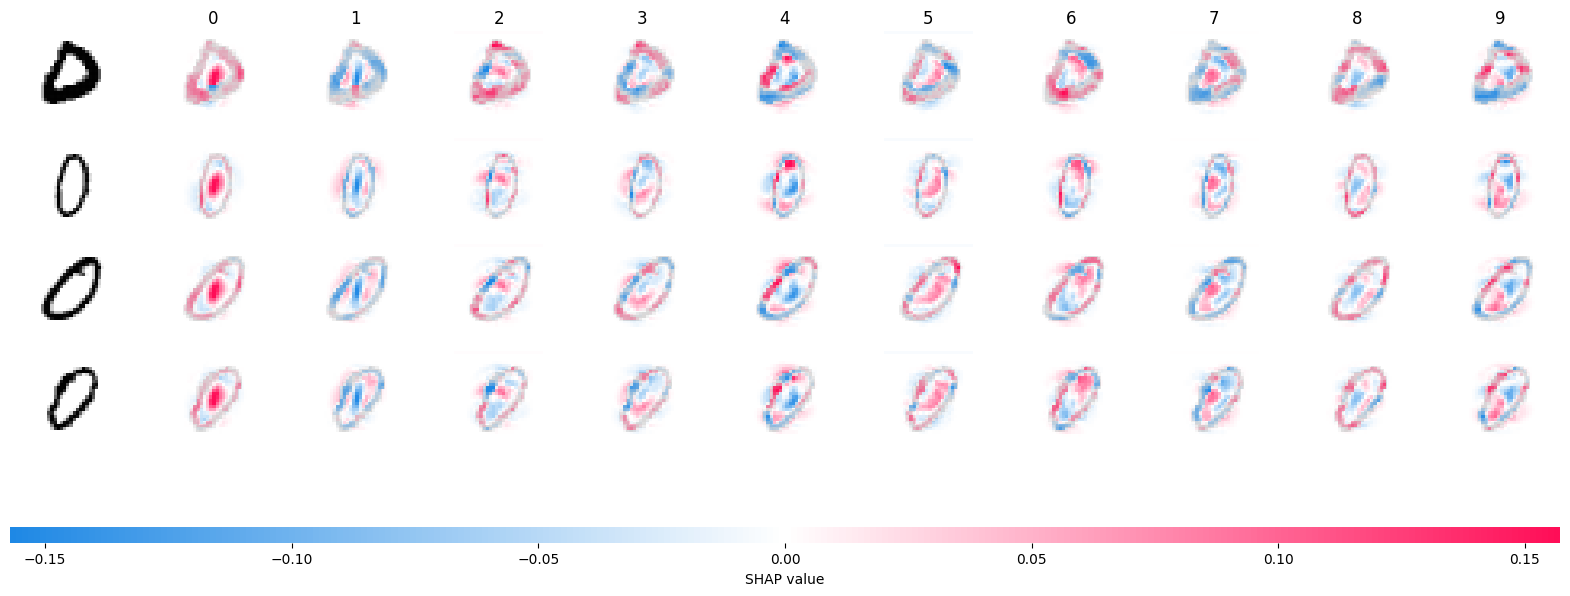

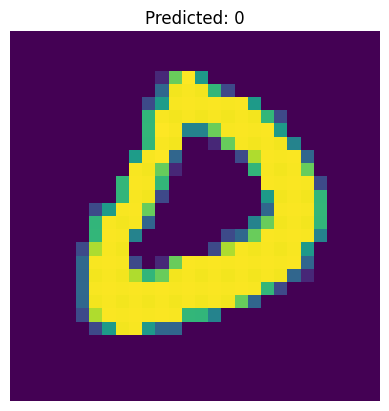

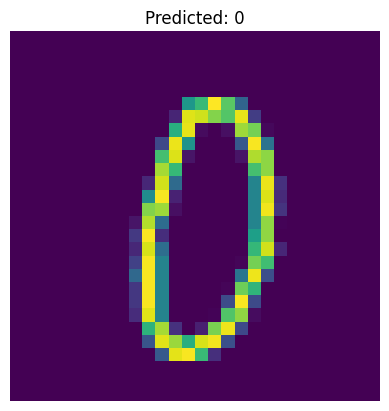

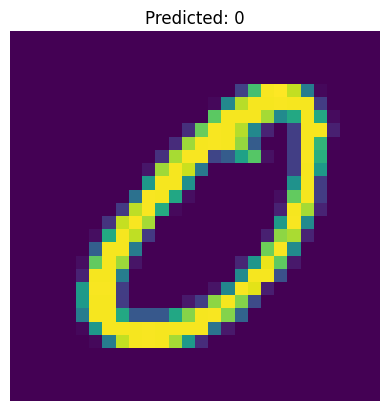

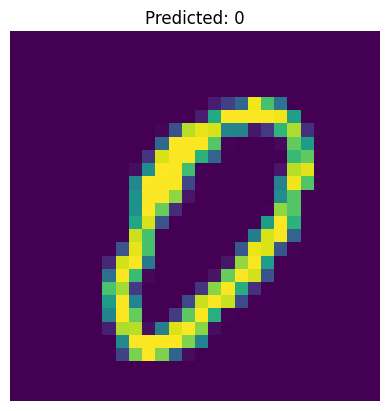

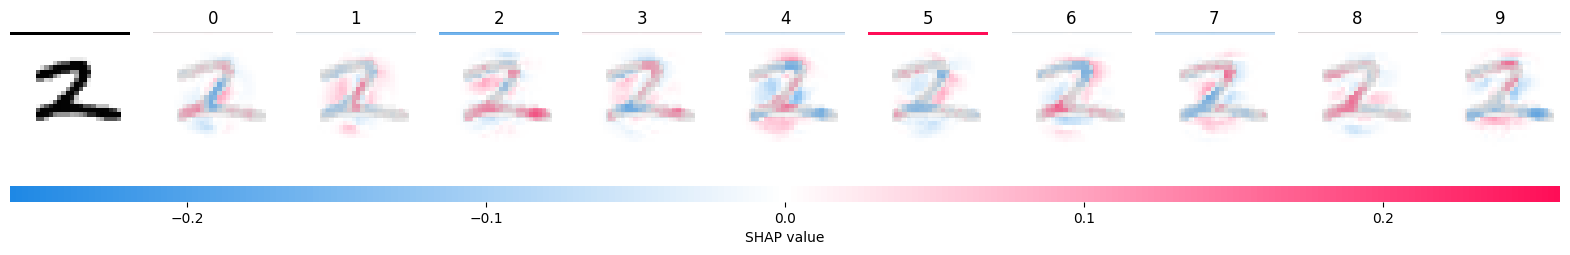

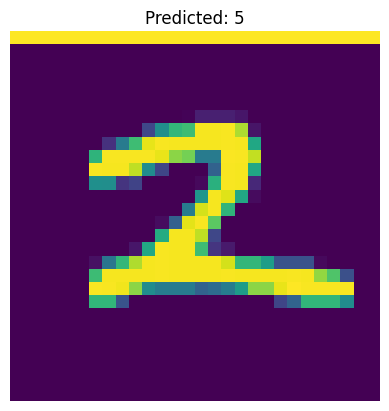

In [17]:
### 5.2) Investigate how the model predicts the number 0.
zero_indices = np.flatnonzero(y_test == 0)
explain_data(X_test[zero_indices[:4]])
for i in range(4):
    check_prediction_image(X_test[zero_indices[i]])

### 5.4 & 5.5) Check the predictions of the encrypted image and explain the predictions using SHAP.
explain_data(encrypted_image) # Explain the encrypted image
check_prediction_image(encrypted_image)